<a href="https://colab.research.google.com/github/bahram3000/google_colab/blob/main/auto_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

In [10]:
gold_df=yf.download(tickers='GC=F',interval='1d')

[*********************100%***********************]  1 of 1 completed
ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['GC=F']: YFRateLimitError('Too Many Requests. Rate limited. Try after a while.')


In [3]:
from my_func_pkg import exp_change

In [4]:
closes=gold_df['Close'].values[:,0]

In [5]:
ret_g=exp_change(closes)

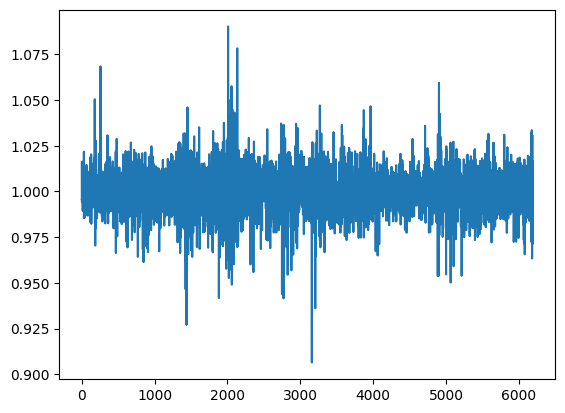

In [6]:
plt.plot(ret_g)

In [7]:
def build_data_for_auto_NN(inp_data,len_x:int,len_y:int):
  ln=len(inp_data)
  x=[]
  y=[]
  for i in range(ln):
    if i+len_x<ln and i+len_x+len_y<ln:
      x.append(inp_data[i:i+len_x])
      y.append(inp_data[i+len_x:i+len_x+len_y])
  return np.array(x),np.array(y)


In [8]:
x,y=build_data_for_auto_NN(ret_g,1000,30)

In [1]:
x.shape

NameError: name 'x' is not defined

In [10]:
y.shape

(5160, 30)

In [15]:
x.reshape(x.shape[0],x.shape[1],1).shape

(5160, 1000, 1)

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, losses

In [13]:
model = models.Sequential([
    layers.LSTM(100, input_shape=(1000,1)),
    layers.Dense(60),
    layers.Dense(30)  # خروجی با همان ابعاد ورودی
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.compile(
    optimizer='adam',
    loss='mse'
)

In [ ]:
model.fit(x, y, epochs=8, batch_size=129)

Epoch 1/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.1442
Epoch 2/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - loss: 1.2894e-04
Epoch 3/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 1.2877e-04
Epoch 4/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 1.3432e-04
Epoch 5/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 1.3314e-04
Epoch 6/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 1.3877e-04
Epoch 7/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 1.4452e-04
Epoch 8/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 1.4715e-04
Epoch 9/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 1.4317e-04
Epoch 10/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - loss: 1.4807e-04
Epoch 11/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 1.5227e-04
Epoch 12/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 1.5046e-04
Epoch 13/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 1.5167e-04
Epoch 14/516
258/258 ━━━━━━━━━━━━━━━━━━━━ 10s 